#### Učitavanje potrebnih biblioteka za rad

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

#### Učitavanje podataka

In [3]:
final_player_stats=pd.read_csv("./organized_data/Konacni_podaci.csv")

#### Izdvajanje atributa potrebnih za modelovanje

In [4]:
X=final_player_stats.drop(columns=['game_id','player','player_team','opposing_team','date','season','points'])
y=final_player_stats['points']

In [5]:
X

,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,Avg_Season_two_points_attempted,Avg_Season_three_points_made,Avg_Season_three_points_attempted,Avg_Season_free_throws_made,Avg_Season_free_throws_attempted,Avg_Season_offensive_rebounds,...,Last_2_Avg_ts%,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points,player_team_win_pct,opposing_team_win_pct
0,1,29.135714,13.523810,3.571429,6.857143,1.190476,3.523810,2.809524,3.428571,0.476190,...,0.400000,24.307692,1,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
1,1,20.897436,12.153846,1.769231,3.615385,1.769231,4.538462,3.307692,3.769231,0.076923,...,0.430000,31.423077,2,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
2,1,26.100000,12.083333,4.250000,8.041667,0.625000,1.833333,1.708333,2.333333,1.791667,...,0.571429,20.923077,3,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
3,1,28.957051,12.076923,2.076923,4.615385,1.615385,4.846154,3.076923,3.307692,0.307692,...,0.550000,31.423077,4,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
4,1,22.953205,11.076923,2.923077,4.846154,1.346154,3.961538,1.192308,1.461538,1.076923,...,0.240000,24.307692,5,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,1,12.859524,8.428571,2.142857,3.857143,1.071429,2.071429,0.928571,1.285714,0.714286,...,0.444444,39.866667,6,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000
24410,1,24.921429,7.857143,3.142857,4.785714,0.000000,0.142857,1.571429,2.214286,1.357143,...,0.666667,17.214286,7,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000
24411,1,16.352381,5.714286,0.857143,1.714286,1.071429,2.000000,0.785714,1.142857,0.142857,...,1.000000,39.866667,8,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000
24412,1,10.650000,2.500000,0.714286,1.285714,0.357143,0.714286,0.000000,0.000000,0.571429,...,1.000000,26.642857,9,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000


In [6]:
y

0         7
1        13
2        17
3         5
4        12
         ..
24409     2
24410    16
24411    16
24412     0
24413     0
Name: points, Length: 24414, dtype: int64

#### Podela podataka na trening, validacioni i test skup podataka

In [7]:
X_train_validation,X_test,y_train_validation,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [8]:
print("X_train_validation shape:",X_train_validation.shape)
print("y_train_validation shape:",y_train_validation.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train_validation shape: (17089, 106)
y_train_validation shape: (17089,)
X_test shape: (7325, 106)
y_test shape: (7325,)


#### Standardizacija

In [9]:
scaler=StandardScaler()
scaler.fit(X_train_validation)
X_train_validation=scaler.transform(X_train_validation)
X_test=scaler.transform(X_test)

#### Testiranje modela AdaBoostRegressor

In [10]:
base_model=LinearRegression()
grid_model=AdaBoostRegressor(estimator=base_model)

params = {
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.1],
}

grid = GridSearchCV(grid_model, param_grid=params, scoring='neg_mean_absolute_error', cv=5, verbose=3)
grid.fit(X_train_validation, y_train_validation)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=-4.054 total time=   8.2s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=-4.037 total time=   8.2s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=-4.149 total time=  10.9s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=-4.043 total time=   8.8s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=-4.061 total time=   8.7s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=-4.061 total time=  18.0s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=-4.049 total time=  19.2s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=-4.162 total time=  16.3s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=-4.052 total time=  15.7s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=-4.071 total time=  15.7s
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=-4.155 total time=  10.5s
[CV 2/5] END learning_r

GridSearchCV(cv=5, estimator=AdaBoostRegressor(estimator=LinearRegression()),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_error', verbose=3)

In [11]:
print(f"Model: {grid_model}")
print(f"Best parameters:\n\tn_estimators: {grid.best_params_['n_estimators']} \n\tlearning_rate: {grid.best_params_['learning_rate']} ")

Model: AdaBoostRegressor(estimator=LinearRegression())
Best parameters:
	n_estimators: 50 
	learning_rate: 0.01 


In [12]:
y_test_pred=grid.best_estimator_.predict(X_test)
y_train_pred=grid.best_estimator_.predict(X_train_validation)

print('Test results:')
print('r2 score: ',r2_score(y_test, y_test_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_test_pred))

print('\n\nTrain results:')
print('r2 score: ', r2_score(y_train_validation, y_train_pred))
print('Mean absolute error: ', mean_absolute_error(y_train_validation, y_train_pred))


Test results:
r2 score:  0.3107047875254847
Mean absolute error:  3.9932366145215594


Train results:
r2 score:  0.3074228288197838
Mean absolute error:  4.039302677651762


#### Testiranje modela BaggingRegresor

In [13]:
base_model=LinearRegression()
grid_model=BaggingRegressor(estimator=base_model)

params={
    'n_estimators':[10,25,50],
    'max_features':[0.3,0.5,0.7,1.0]
}

grid = GridSearchCV(grid_model, param_grid=params, cv=5, scoring='neg_mean_absolute_error',verbose=3)
grid.fit(X_train_validation, y_train_validation)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_features=0.3, n_estimators=10;, score=-4.067 total time=   0.2s
[CV 2/5] END max_features=0.3, n_estimators=10;, score=-4.042 total time=   0.2s
[CV 3/5] END max_features=0.3, n_estimators=10;, score=-4.153 total time=   0.2s
[CV 4/5] END max_features=0.3, n_estimators=10;, score=-4.041 total time=   0.2s
[CV 5/5] END max_features=0.3, n_estimators=10;, score=-4.050 total time=   0.2s
[CV 1/5] END max_features=0.3, n_estimators=25;, score=-4.060 total time=   0.5s
[CV 2/5] END max_features=0.3, n_estimators=25;, score=-4.039 total time=   0.4s
[CV 3/5] END max_features=0.3, n_estimators=25;, score=-4.158 total time=   0.4s
[CV 4/5] END max_features=0.3, n_estimators=25;, score=-4.054 total time=   0.4s
[CV 5/5] END max_features=0.3, n_estimators=25;, score=-4.049 total time=   0.4s
[CV 1/5] END max_features=0.3, n_estimators=50;, score=-4.055 total time=   0.8s
[CV 2/5] END max_features=0.3, n_estimators=50;,

GridSearchCV(cv=5, estimator=BaggingRegressor(estimator=LinearRegression()),
             param_grid={'max_features': [0.3, 0.5, 0.7, 1.0],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_mean_absolute_error', verbose=3)

In [14]:
print(f"Model: {grid_model}")
print(f"Best parameters:\n\tn_estimators: {grid.best_params_['n_estimators']} \n\tlearning_rate: {grid.best_params_['max_features']} ")

Model: BaggingRegressor(estimator=LinearRegression())
Best parameters:
	n_estimators: 50 
	learning_rate: 0.7 


In [15]:
y_test_pred=grid.best_estimator_.predict(X_test)
y_train_pred=grid.best_estimator_.predict(X_train_validation)

print('Test results:')
print('r2 score: ',r2_score(y_test, y_test_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_test_pred))

print('\n\nTrain results:')
print('r2 score: ', r2_score(y_train_validation, y_train_pred))
print('Mean absolute error: ', mean_absolute_error(y_train_validation, y_train_pred))


Test results:
r2 score:  0.3130452592933425
Mean absolute error:  3.9832784605075906


Train results:
r2 score:  0.30652937025059734
Mean absolute error:  4.0353547402475085


#### Grafički prikaz rezultata BaggingRegressor za različite vrednosti hiperparametara

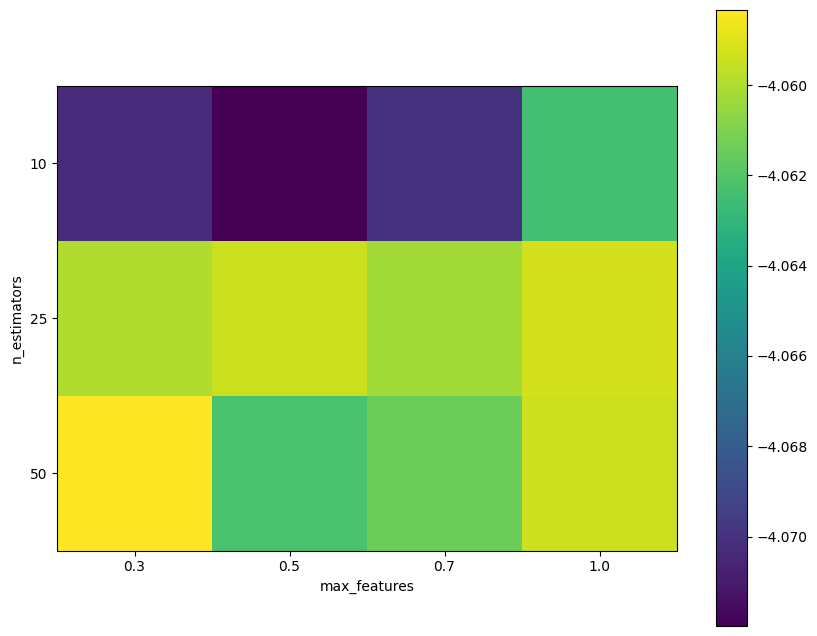

In [16]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_test_score = cv_results['mean_test_score'].values.reshape(3, 4)

n_estimators=[10,25,50]
max_features=[0.3,0.5,0.7,1.0]

plt.figure(figsize=(10, 8))

plt.ylabel('n_estimators')
plt.yticks(np.arange(0, len(n_estimators)), n_estimators)

plt.xlabel('max_features')
plt.xticks(np.arange(0, len(max_features)), max_features)

plt.imshow(cv_test_score, cmap='viridis')
plt.colorbar()
#plt.savefig("./figures/Bagging_regressor_mean_test_score.png",dpi=300)
plt.show()